In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
HOG="Oct20_N1.tsv" ##othofinder output file
barley_del="barley_pangenome_gene_deletion_count.txt" ## barley gene matrix output
wheat_del="wheat_pangenome_gene_deletion_count.txt" ## wheat gene matrix output
emmer_del="emmer_pangenome_gene_deletion_count.txt" ## wild emmer CNV output

In [3]:
HF=pd.read_csv(HOG,header=0,sep="\t")

In [4]:
HF.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley
0,N1.HOG0000000,OG0000000,n27,NaN,NaN,TRIDC6BG006600.1,TraesCS6A02G038600,TraesCS6B02G053500,TraesCS2D02G316700,HORVU.MOREX.r2.6HG0453070.1
1,N1.HOG0000001,OG0000000,n31,NaN,NaN,NaN,TraesCS6A02G038400,TraesCS6B02G053300,NaN,HORVU.MOREX.r2.6HG0453060.1
2,N1.HOG0000002,OG0000000,n33,NaN,NaN,NaN,TraesCS7A02G158300,NaN,TraesCS6D02G044300,NaN
3,N1.HOG0000003,OG0000000,n34,NaN,NaN,NaN,TraesCS7A02G067800,TraesCS7B02G063000,TraesCS7D02G432000,NaN
4,N1.HOG0000004,OG0000000,n36,NaN,NaN,NaN,NaN,TraesCS7B02G062700,TraesCS7D02G061500,NaN


## merge A B D subgenome gene ids

In [5]:
HF['emmer'] = HF[HF.columns[4:6]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
HF['wheat'] = HF[HF.columns[6:9]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [6]:
HF.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat
0,N1.HOG0000000,OG0000000,n27,NaN,NaN,TRIDC6BG006600.1,TraesCS6A02G038600,TraesCS6B02G053500,TraesCS2D02G316700,HORVU.MOREX.r2.6HG0453070.1,TRIDC6BG006600.1,"TraesCS6A02G038600, TraesCS6B02G053500, TraesC..."
1,N1.HOG0000001,OG0000000,n31,NaN,NaN,NaN,TraesCS6A02G038400,TraesCS6B02G053300,NaN,HORVU.MOREX.r2.6HG0453060.1,,"TraesCS6A02G038400, TraesCS6B02G053300"
2,N1.HOG0000002,OG0000000,n33,NaN,NaN,NaN,TraesCS7A02G158300,NaN,TraesCS6D02G044300,NaN,,"TraesCS7A02G158300, TraesCS6D02G044300"
3,N1.HOG0000003,OG0000000,n34,NaN,NaN,NaN,TraesCS7A02G067800,TraesCS7B02G063000,TraesCS7D02G432000,NaN,,"TraesCS7A02G067800, TraesCS7B02G063000, TraesC..."
4,N1.HOG0000004,OG0000000,n36,NaN,NaN,NaN,NaN,TraesCS7B02G062700,TraesCS7D02G061500,NaN,,"TraesCS7B02G062700, TraesCS7D02G061500"


## Rate calculation

In [7]:
bf=pd.read_csv(barley_del,header=None,delim_whitespace=True)
wf=pd.read_csv(wheat_del,header=None,delim_whitespace=True)
ef=pd.read_csv(emmer_del,header=None,delim_whitespace=True)

In [8]:
bf.set_index(0,inplace=True)

In [9]:
#barley
HOG_id_list=[]
barley_rates=[]
j=0
c=0
d=0
e=0
f=0
for index, row in HF.iterrows(): # iteritems may not consider empty value;
    j+=1
    HOG_id_list.append(str(row["barley"]).split(", "))

for item in HOG_id_list:
    ####get occurence number for each gene in present in HOG groups, put in a list: generate
    generate=[]
    if item==["nan"]:
        c+=1
    else:
        d+=1
        for i in item: # loop over barley genes
            if i in bf.index: # get pan gene occurence number, if available, some gene may not
                generate+=[int(bf.loc[i,1])]
    
    ## calculate gene retention rate for each HOG group
    if generate==[]:
        e+=1
        rate=""
    else:
        f+=1
        rate=sum([x for x in generate])/len(generate)
        rate=1-rate/19
    
    ## add rate for each HOG to list
    barley_rates.append(rate)

In [10]:
## Wheat, get_homologue-est results contain alternative transcripts, use the transcript with the highest count

In [11]:
grouped_wf = wf.groupby(0)
maximums = grouped_wf.max()
maximums.head()

,1
0,
TraesCS1A02G000100,9
TraesCS1A02G000200,10
TraesCS1A02G000300,5
TraesCS1A02G000400,13
TraesCS1A02G000500,8


In [12]:
wf = maximums

In [13]:
###wheat
HOG_id_list=[]
wheat_rates=[]
j=0
c=0
d=0
e=0
f=0
for index, row in HF.iterrows(): # iteritems may not consider empty value;
    j+=1
    HOG_id_list.append(str(row["wheat"]).split(", "))

for item in HOG_id_list:
    ####get occurence number for each gene in present in HOG groups, put in a list: generate
    generate=[]
    if item==["nan"]:
        c+=1
    else:
        d+=1
        for i in item: # loop over barley genes
            #wid = i.split(".")[0] # old gene id containing "cds"
            wid = i
            if wid in wf.index: # get pan gene occurence number, if available, some gene may not
                generate+=[int(wf.loc[wid,1])]
    
    ## calculate gene retention rate for each HOG group
    if generate==[]:
        e+=1
        rate=""
    else:
        f+=1
        rate=sum([x for x in generate])/len(generate)
        rate=1-rate/15
    
    ## add rate for each HOG to list
    wheat_rates.append(rate)

In [14]:
ef.set_index(0,inplace=True)

In [15]:
###emmer
HOG_id_list=[]
emmer_rates=[]
j=0
c=0
d=0
e=0
f=0
for index, row in HF.iterrows(): # iteritems may not consider empty value;
    j+=1
    HOG_id_list.append(str(row["emmer"]).split(", "))

for item in HOG_id_list:
    ####get occurence number for each gene in present in HOG groups, put in a list: generate
    generate=[]
    if item==["nan"]:
        c+=1
    else:
        d+=1
        for i in item: # loop over barley genes
            eid = i.split(".")[0]
            if eid in ef.index: # get pan gene occurence number, if available, some gene may not
                generate+=[int(ef.loc[eid,1])]
    
    ## calculate gene retention rate for each HOG group
    if generate==[]:
        e+=1
        rate=""
    else:
        f+=1
        rate=sum([x for x in generate])/len(generate)
        rate=1-rate/20
    
    ## add rate for each HOG to list
    emmer_rates.append(rate)

In [16]:
HF["barley_rates"]=barley_rates
HF["wheat_rates"]=wheat_rates
HF["emmer_rates"]=emmer_rates

In [17]:
HF.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates
0,N1.HOG0000000,OG0000000,n27,NaN,NaN,TRIDC6BG006600.1,TraesCS6A02G038600,TraesCS6B02G053500,TraesCS2D02G316700,HORVU.MOREX.r2.6HG0453070.1,TRIDC6BG006600.1,"TraesCS6A02G038600, TraesCS6B02G053500, TraesC...",,0.866667,
1,N1.HOG0000001,OG0000000,n31,NaN,NaN,NaN,TraesCS6A02G038400,TraesCS6B02G053300,NaN,HORVU.MOREX.r2.6HG0453060.1,,"TraesCS6A02G038400, TraesCS6B02G053300",,,
2,N1.HOG0000002,OG0000000,n33,NaN,NaN,NaN,TraesCS7A02G158300,NaN,TraesCS6D02G044300,NaN,,"TraesCS7A02G158300, TraesCS6D02G044300",,,
3,N1.HOG0000003,OG0000000,n34,NaN,NaN,NaN,TraesCS7A02G067800,TraesCS7B02G063000,TraesCS7D02G432000,NaN,,"TraesCS7A02G067800, TraesCS7B02G063000, TraesC...",,,
4,N1.HOG0000004,OG0000000,n36,NaN,NaN,NaN,NaN,TraesCS7B02G062700,TraesCS7D02G061500,NaN,,"TraesCS7B02G062700, TraesCS7D02G061500",,,


In [18]:
HF.columns

Index(['HOG', 'OG', 'Gene Tree Parent Clade', 'Bdistachyon_pep', 'EM_A_pep',
       'EM_B_pep', 'TaCS_A_pep_longest', 'TaCS_B_pep_longest',
       'TaCS_D_pep_longest', 'barley', 'emmer', 'wheat', 'barley_rates',
       'wheat_rates', 'emmer_rates'],
      dtype='object')

In [19]:
## Fill empty cell with nan
HF = HF.replace(r'^\s*$', np.nan, regex=True)
HF.to_csv("retention_rate_calculation_wheatV2.csv",index=False)

In [20]:
## filter barley gene retention rates not null
df_barley=HF[HF["barley_rates"].notnull()]

In [21]:
df_barley.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates
28,N1.HOG0000028,OG0000001,n0,NaN,NaN,TRIDC5BG044300.1,NaN,NaN,NaN,"HORVU.MOREX.r2.6HG0490200.1, HORVU.MOREX.r2.7H...",TRIDC5BG044300.1,NaN,0.691729,NaN,NaN
30,N1.HOG0000030,OG0000002,n6,NaN,NaN,NaN,NaN,NaN,TraesCS6D02G029800,HORVU.MOREX.r2.5HG0446590.1,NaN,TraesCS6D02G029800,0.421053,0.400000,NaN
32,N1.HOG0000032,OG0000002,n10,NaN,TRIDC4AG026920.1,NaN,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...","TraesCS2B02G319900, TraesCS1B02G127100, TraesC...","TraesCS7D02G442000, TraesCS3D02G507200, TraesC...","HORVU.MOREX.r2.3HG0196890.1, HORVU.MOREX.r2.2H...",TRIDC4AG026920.1,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...",0.500000,0.419048,0.9
33,N1.HOG0000033,OG0000002,n46,NaN,NaN,NaN,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",NaN,HORVU.MOREX.r2.3HG0257070.1,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",0.947368,0.800000,NaN
34,N1.HOG0000034,OG0000002,n50,NaN,NaN,NaN,TraesCS1A02G140000,TraesCS5B02G179400,NaN,HORVU.MOREX.r2.5HG0446830.1,NaN,"TraesCS1A02G140000, TraesCS5B02G179400",0.631579,0.466667,NaN


## target gene selection for enrichment analyses

In [22]:
df_barley["barley/emmer"]=df_barley["barley_rates"]/df_barley["emmer_rates"]
df_barley["barley/wheat"]=df_barley["barley_rates"]/df_barley["wheat_rates"]
df_barley["emmer/wheat"]=df_barley["emmer_rates"]/df_barley["wheat_rates"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [23]:
## save gene retention rates results
df_barley.to_csv("df_barley.csv",index=False)

In [24]:
## select HPT2-like genes
df_target = df_barley[(df_barley["emmer/wheat"]>=1.01) & (df_barley["barley/emmer"]>=1.01)]
df_target.shape

(314, 18)

In [25]:
df_target.to_csv("df_target_wheatV2.csv",index=False)

## barley and wheat rates comparison

In [26]:
from Bio import SeqIO
barleyV2 = "barley_V2_pep.fasta"

In [27]:
## refer above for df_target, which counts wheat_rates as well
Group1 = df_barley[df_barley["barley/wheat"]>1.2]
Group2 = df_barley[(df_barley["barley/wheat"]<1.1) & (df_barley["barley/wheat"]>0.9)]
Group3 = df_barley[df_barley["barley/wheat"]<0.8]

In [28]:
id_list = []
for index, row in Group1.iterrows():
    id_list +=row["barley"].split(", ")

with open("Group1_wheatV2.fasta", "w") as f, open("Group1_wheatV2.txt","w") as f2:
    for rec in SeqIO.parse(barleyV2,"fasta"):
        if rec.id in id_list:
            f2.write('%s\n' % rec.id)
            SeqIO.write(rec,f,"fasta")

In [29]:
id_list = []
for index, row in Group2.iterrows():
    id_list +=row["barley"].split(", ")

with open("Group2_wheatV2.fasta", "w") as f, open("Group2_wheatV2.txt","w") as f2:
    for rec in SeqIO.parse(barleyV2,"fasta"):
        if rec.id in id_list:
            f2.write('%s\n' % rec.id)
            SeqIO.write(rec,f,"fasta")

In [30]:
id_list = []
for index, row in Group3.iterrows():
    id_list +=row["barley"].split(", ")

with open("Group3_wheatV2.fasta", "w") as f, open("Group3_wheatV2.txt","w") as f2:
    for rec in SeqIO.parse(barleyV2,"fasta"):
        if rec.id in id_list:
            f2.write('%s\n' % rec.id)
            SeqIO.write(rec,f,"fasta")

## Figure 4B

In [31]:
HF = pd.read_csv("retention_rate_calculation_wheatV2.csv",header=0)
HF.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates
0,N1.HOG0000000,OG0000000,n27,NaN,NaN,TRIDC6BG006600.1,TraesCS6A02G038600,TraesCS6B02G053500,TraesCS2D02G316700,HORVU.MOREX.r2.6HG0453070.1,TRIDC6BG006600.1,"TraesCS6A02G038600, TraesCS6B02G053500, TraesC...",NaN,0.866667,NaN
1,N1.HOG0000001,OG0000000,n31,NaN,NaN,NaN,TraesCS6A02G038400,TraesCS6B02G053300,NaN,HORVU.MOREX.r2.6HG0453060.1,NaN,"TraesCS6A02G038400, TraesCS6B02G053300",NaN,NaN,NaN
2,N1.HOG0000002,OG0000000,n33,NaN,NaN,NaN,TraesCS7A02G158300,NaN,TraesCS6D02G044300,NaN,NaN,"TraesCS7A02G158300, TraesCS6D02G044300",NaN,NaN,NaN
3,N1.HOG0000003,OG0000000,n34,NaN,NaN,NaN,TraesCS7A02G067800,TraesCS7B02G063000,TraesCS7D02G432000,NaN,NaN,"TraesCS7A02G067800, TraesCS7B02G063000, TraesC...",NaN,NaN,NaN
4,N1.HOG0000004,OG0000000,n36,NaN,NaN,NaN,NaN,TraesCS7B02G062700,TraesCS7D02G061500,NaN,NaN,"TraesCS7B02G062700, TraesCS7D02G061500",NaN,NaN,NaN


In [32]:
df_OGcount = HF.groupby("OG").size().reset_index(name='OG_counts')
df_OGcount.head()

,OG,OG_counts
0,OG0000000,28
1,OG0000001,1
2,OG0000002,10
3,OG0000003,9
4,OG0000004,25


In [33]:
HF2 = HF.merge(df_OGcount,on="OG",how="left")
HF2 = HF2.groupby("OG").mean()
HF2.head()

,Bdistachyon_pep,barley_rates,wheat_rates,emmer_rates,OG_counts
OG,,,,,
OG0000000,NaN,NaN,0.866667,0.714583,28
OG0000001,NaN,0.691729,NaN,NaN,1
OG0000002,NaN,0.644737,0.573072,0.725000,10
OG0000003,NaN,NaN,0.754839,0.926667,9
OG0000004,NaN,0.894737,0.626667,0.781250,25


In [34]:
DF1=HF2[(HF2["barley_rates"]>0.1)][["barley_rates","OG_counts"]]
DF2=HF2[(HF2["emmer_rates"]>0.1)][["emmer_rates","OG_counts"]]
DF3=HF2[(HF2["wheat_rates"]>0.1)][["wheat_rates","OG_counts"]]

In [35]:
DF1.dropna(inplace=True)
DF2.dropna(inplace=True)
DF3.dropna(inplace=True)

In [36]:
DF1["barley_rates"] = DF1["barley_rates"] * 100
DF2["emmer_rates"] = DF2["emmer_rates"] * 100
DF3["wheat_rates"] = DF3["wheat_rates"] * 100

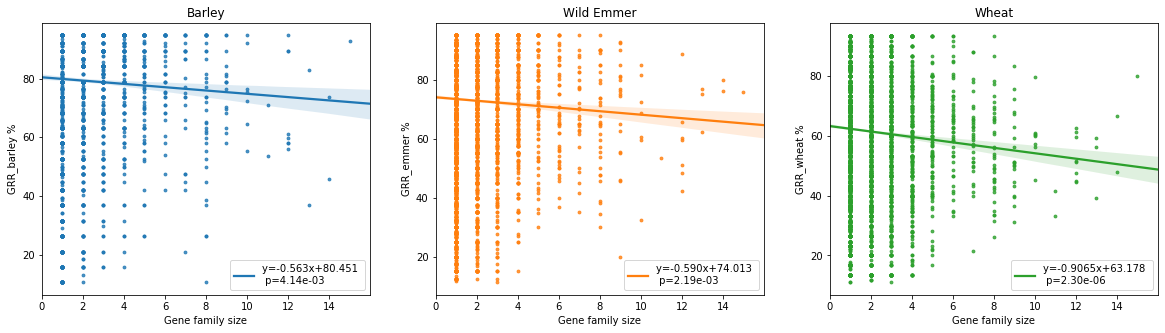

In [37]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
slope, intercept, r_value, p_value, std_err = stats.linregress(DF1["OG_counts"],DF1["barley_rates"])
sns.regplot(ax=ax1,x="OG_counts",y="barley_rates",data=DF1,\
            line_kws={'label':"y={0:.3f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept, p_value)},\
           scatter_kws={'s':8})
#ax1.set_ylim([0.2,1.1])
ax1.legend(loc="lower right")
ax1.set_xlim(0,16)
ax1.set_xticks(np.arange(0,16,2))

slope, intercept, r_value, p_value, std_err = stats.linregress(DF2["OG_counts"],DF2["emmer_rates"])
sns.regplot(ax=ax2,x="OG_counts",y="emmer_rates",data=DF2,\
            line_kws={'label':"y={0:.3f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept,p_value)},\
           scatter_kws={'s':8})
ax2.legend()
ax2.set_xlim(0,16)
ax2.set_xticks(np.arange(0,16,2))

slope, intercept, r_value, p_value, std_err = stats.linregress(DF3["OG_counts"],DF3["wheat_rates"])
sns.regplot(ax=ax3,x="OG_counts",y="wheat_rates",data=DF3,\
            line_kws={'label':"y={0:.4f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept,p_value)},\
           scatter_kws={'s':8})
ax3.legend(loc="lower right")
#ax3.set_ylim(0,100)
ax3.set_xlim(0,16)
ax3.set_xticks(np.arange(0,16,2))

ax1.set(title= 'Barley', xlabel='Gene family size', ylabel='GRR_barley %')
ax2.set(title='Wild Emmer',xlabel='Gene family size', ylabel='GRR_emmer %')
ax3.set(title='Wheat',xlabel='Gene family size', ylabel='GRR_wheat %')

plt.show()

In [38]:
fig.savefig("Figure4B_wheatV2.png",dpi=600)

## Figure6A,6B plotting

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
df_barley = pd.read_csv("df_barley.csv",header=0)
df_barley.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates,barley/emmer,barley/wheat,emmer/wheat
0,N1.HOG0000028,OG0000001,n0,NaN,NaN,TRIDC5BG044300.1,NaN,NaN,NaN,"HORVU.MOREX.r2.6HG0490200.1, HORVU.MOREX.r2.7H...",TRIDC5BG044300.1,NaN,0.691729,NaN,NaN,NaN,NaN,NaN
1,N1.HOG0000030,OG0000002,n6,NaN,NaN,NaN,NaN,NaN,TraesCS6D02G029800,HORVU.MOREX.r2.5HG0446590.1,NaN,TraesCS6D02G029800,0.421053,0.400000,NaN,NaN,1.052632,NaN
2,N1.HOG0000032,OG0000002,n10,NaN,TRIDC4AG026920.1,NaN,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...","TraesCS2B02G319900, TraesCS1B02G127100, TraesC...","TraesCS7D02G442000, TraesCS3D02G507200, TraesC...","HORVU.MOREX.r2.3HG0196890.1, HORVU.MOREX.r2.2H...",TRIDC4AG026920.1,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...",0.500000,0.419048,0.9,0.555556,1.193182,2.147727
3,N1.HOG0000033,OG0000002,n46,NaN,NaN,NaN,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",NaN,HORVU.MOREX.r2.3HG0257070.1,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",0.947368,0.800000,NaN,NaN,1.184211,NaN
4,N1.HOG0000034,OG0000002,n50,NaN,NaN,NaN,TraesCS1A02G140000,TraesCS5B02G179400,NaN,HORVU.MOREX.r2.5HG0446830.1,NaN,"TraesCS1A02G140000, TraesCS5B02G179400",0.631579,0.466667,NaN,NaN,1.353383,NaN


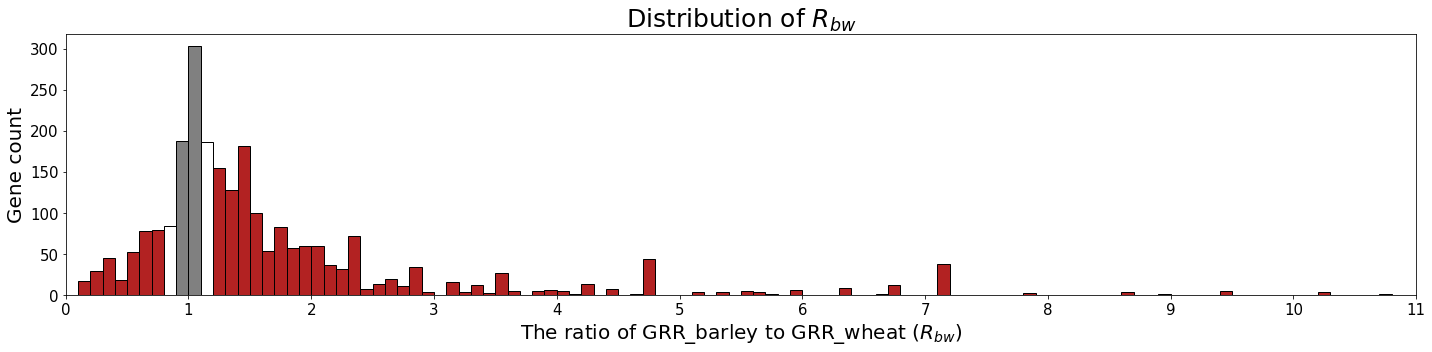

In [41]:
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(figsize=(20, 5))
N, bins, patches = ax.hist(df_barley["barley/wheat"],bins=np.arange(0,11.1,0.1),edgecolor='k', linewidth=1)

for i in range(0,8):
    patches[i].set_facecolor('firebrick')
for i in range(8,9):
    patches[i].set_facecolor('white')
for i in range(9,11):    
    patches[i].set_facecolor('gray')
for i in range(11,12):
    patches[i].set_facecolor('white')
for i in range(12, len(patches)):
    patches[i].set_facecolor('firebrick')

ax.set_xticks(np.arange(0,12,1))

ax.set(title= r'Distribution of $R_{bw}$', xlabel='The ratio of GRR_barley to GRR_wheat ($R_{bw}$)', ylabel='Gene count')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
# ax[1].hist(df_barley["barley/emmer"][df_barley["barley/emmer"]<=50],bins=np.arange(0,15,0.2))
# ax[1].title.set_text("barley/emmer")

# ax[2].hist(df_barley["emmer/wheat"],bins=np.arange(0,15,0.2))
# ax[2].title.set_text("emmer/wheat")

# for i in range(0,3,1):
#     ax[i].set_xticks(np.arange(0,15,1))
#plt.legend(loc='upper center')
ax.set_xlim(0,11)
#ax.invert_xaxis()
fig.tight_layout()
plt.show()

In [42]:
fig.savefig("Figure6A_wheatV2.png", dpi=600)

In [43]:
df_4C = pd.read_excel("./gene_duplication_type/gene_type_count_wheatV2.xlsx",sheet_name="HPT2_like", header=None)
df_4C.head()

,0,1
0,singleton,8
1,dispersed,194
2,proximal,48
3,tandem,70
4,WGD,6


In [44]:
df_4C["sum"]=df_4C[1].sum()

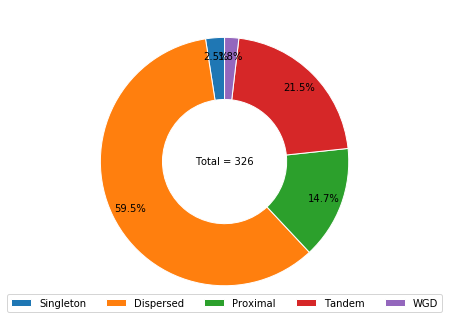

In [45]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lbls = ['', '', '', '', '']
# sizes = [15, 30, 45, 10]

# Intended to serve something like a global variable
class MyClass:
    i = -1

def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

fig,ax1 = plt.subplots(1,1,figsize=(6,6))

## with percentage label
ax1.pie(df_4C[1], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
       startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)
##no percentage label
# ax1.pie(df_4C[1], wedgeprops=dict(width=0.5,edgecolor='w'), labels=lbls,\
#         startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr1 = 'Total = ' + str(df_4C[1].sum())
# String on the donut center
ax1.text(0., 0., sumstr1, horizontalalignment='center', verticalalignment='center')

LABELS = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
plt.legend(LABELS,fontsize=10,ncol=5,loc="lower center")
plt.tight_layout()
plt.show()

In [46]:
df_6b = pd.read_excel("./gene_duplication_type/gene_type_count_wheatV2.xlsx",sheet_name="Group123", header=None)
df_6b.head()

,0,1,2,3
0,singleton,71,36,10
1,dispersed,935,423,218
2,proximal,200,83,64
3,tandem,353,141,87
4,WGD,62,24,10


In [47]:
df_6b.columns = ["type",">=1.2","0.9-1.1","<=0.8"]

In [48]:
df_6b["sum1"]=df_6b[">=1.2"].sum()
df_6b["sum2"]=df_6b["0.9-1.1"].sum()
df_6b["sum3"]=df_6b["<=0.8"].sum()

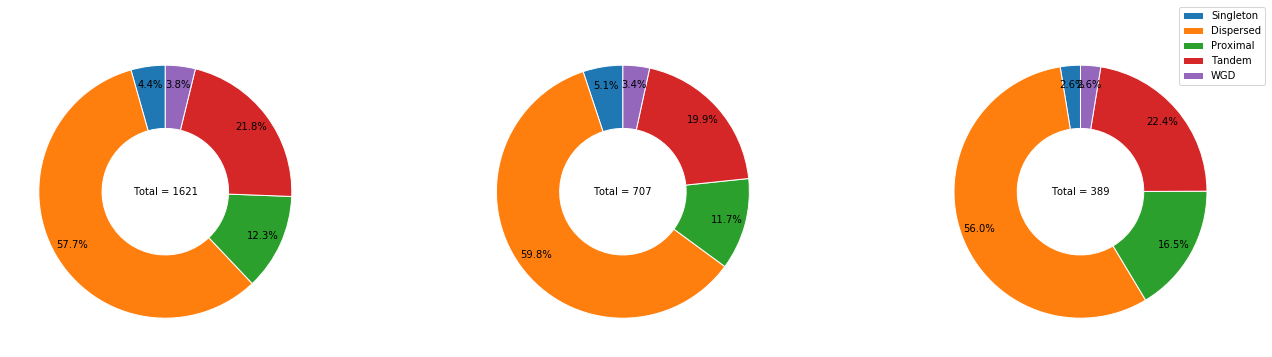

In [49]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lbls = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
lbls = ['', '', '', '', '']
# sizes = [15, 30, 45, 10]

# Intended to serve something like a global variable
class MyClass:
    i = -1

def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
#fig1, ax1 = plt.subplots()
# Pie wedgeprops with width being the donut thickness
#ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5), autopct=lambda pct: func(pct, df_6b.type, df_6b[">=1.2"]),
#        shadow=True, startangle=90,pctdistance=1.1, labeldistance=1.2,rotatelabels=True)

ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr1 = 'Total = ' + str(df_6b[">=1.2"].sum())
# String on the donut center
ax1.text(0., 0., sumstr1, horizontalalignment='center', verticalalignment='center')


ax2.pie(df_6b["0.9-1.1"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr2 = 'Total = ' + str(df_6b["0.9-1.1"].sum())
# String on the donut center
ax2.text(0., 0., sumstr2, horizontalalignment='center', verticalalignment='center')


ax3.pie(df_6b["<=0.8"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr3 = 'Total = ' + str(df_6b["<=0.8"].sum())
# String on the donut center
ax3.text(0., 0., sumstr3, horizontalalignment='center', verticalalignment='center')

LABELS = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
plt.legend(LABELS,fontsize=10,ncol=1,loc="best",bbox_to_anchor=(0.6, 0.6, 0.5, 0.5))

plt.tight_layout()
plt.show()

In [50]:
fig.savefig("Figure6B_wheatV2.png",dpi=600)

# Generate gene pairs for kaks calculation

### For target HPT2-like genes, get OG list, retrieve all HOGs for these OGs, including HOGs not present in target, calculate kaks for each HOGs, compare those HOGs present in target with those not

In [51]:
from itertools import combinations

In [52]:
df_target.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates,barley/emmer,barley/wheat,emmer/wheat
102,N1.HOG0000102,OG0000006,n36,NaN,"TRIDC6AG012020.1, TRIDC1AG054270.1, TRIDC1AG05...","TRIDC6BG017380.1, TRIDC1BG062120.1",TraesCS6A02G094200,"TraesCS6B02G122600, TraesCS1B02G388200, TraesC...","TraesCS1D02G375100, TraesCS1D02G374900, TraesC...","HORVU.MOREX.r2.1HG0073480.1, HORVU.MOREX.r2.1H...","TRIDC6AG012020.1, TRIDC1AG054270.1, TRIDC1AG05...","TraesCS6A02G094200, TraesCS6B02G122600, TraesC...",0.947368,0.600000,0.71250,1.329640,1.578947,1.187500
255,N1.HOG0000255,OG0000025,n39,NaN,NaN,TRIDC6BG003200.1,TraesCS6A02G021800,NaN,NaN,"HORVU.MOREX.r2.6HG0450550.1, HORVU.MOREX.r2.6H...",TRIDC6BG003200.1,TraesCS6A02G021800,0.894737,0.733333,0.85000,1.052632,1.220096,1.159091
275,N1.HOG0000275,OG0000027,n10,NaN,TRIDC3AG061550.1,TRIDC3BG083090.1,"TraesCS4A02G483600, TraesCS3A02G435200",TraesCS3B02G575400,NaN,HORVU.MOREX.r2.7HG0528980.1,"TRIDC3AG061550.1, TRIDC3BG083090.1","TraesCS4A02G483600, TraesCS3A02G435200, TraesC...",0.894737,0.133333,0.85000,1.052632,6.710526,6.375000
286,N1.HOG0000286,OG0000027,n65,NaN,TRIDC2AG071110.1,TRIDC2BG076950.1,TraesCS2A02G505200,TraesCS2B02G533400,TraesCS2D02G505900,HORVU.MOREX.r2.2HG0168960.1,"TRIDC2AG071110.1, TRIDC2BG076950.1","TraesCS2A02G505200, TraesCS2B02G533400, TraesC...",0.947368,0.066667,0.85000,1.114551,14.210526,12.750000
313,N1.HOG0000313,OG0000032,n19,NaN,"TRIDC7AG060800.1, TRIDC6AG012470.1, TRIDC6AG01...","TRIDC7BG053840.1, TRIDC6BG017660.1, TRIDC5BG06...","TraesCS6A02G096700, TraesCS7A02G437300, TraesC...","TraesCS7B02G336300, TraesCS6B02G125200, TraesC...","TraesCS7D02G427200, TraesCS6D02G087800, TraesC...",HORVU.MOREX.r2.1HG0008270.1,"TRIDC7AG060800.1, TRIDC6AG012470.1, TRIDC6AG01...","TraesCS6A02G096700, TraesCS7A02G437300, TraesC...",0.947368,0.633333,0.71875,1.318078,1.495845,1.134868


In [53]:
target_OGs = list(df_target["OG"].unique())

In [54]:
len(target_OGs)

303

In [55]:
df_OG = df_barley[df_barley["OG"].isin(target_OGs)]

In [56]:
df_OG.shape

(434, 18)

In [57]:
## generate gene ID pairs for each HOG group
##get the barley ID with decreasing retention rates across three species
HOG_gene_pair_list = []
with open("barley_wheat_emmer_inter_pairs.txt","w") as f:
    for index, row in df_OG.iterrows():
        row_list=str(row["barley"]).split(", ") + str(row["wheat"]).split(", ") + str(row["emmer"]).split(", ")

        row_list = [x for x in row_list if x!="nan"] ##remove "nan"
        res = list(combinations(row_list, 2))
        for tp in res:
                if tp[0][:4] != tp[1][:4]: ## only inter gene pairs
                    f.write(row["HOG"]+'-'+row["OG"]+'-'+'-'.join(list(tp))+'\n')

In [58]:
## generate gene, HOG, OG IDs matches
HOG_gene_pair_list = []
with open("df_target_gene_HOG_OG.txt","w") as f:
    for index, row in df_OG.iterrows():
        row_list=str(row["barley"]).split(", ") + str(row["wheat"]).split(", ") + str(row["emmer"]).split(", ")

        row_list = [x for x in row_list if x!="nan"] ##remove "nan"
        for gene in row_list:
                f.write(row["HOG"]+'\t'+row["OG"]+'\t'+gene+'\n')

## KaKs calculation

In [1]:
# input files:
#1. barley_wheat_emmer_inter_pairs.txt
#2. merged_pep.fasta
#3. merged_cds.fasta

# commands run in bash
#ParaAT.pl -h gene_pairs -a merged_pep.fasta -n merged_cds.fasta -p processor_num.txt \
#-o output -m muscle -f axt -g -t -k

# output
#cat ./output/*.kaks > merged.kaks

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

In [4]:
df_kaks = pd.read_csv("./kaks_calculation/merged.kaks",header=0,sep="\t")
df_kaks.head()

,Sequence,Method,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),...,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,Substitution-Rate-Ratio(rTC:rAG:rTA:rCG:rTG:rCA/rCA),GC(1:2:3),ML-Score,AICc,Akaike-Weight,Model
0,HORVU.MOREX.r2.1HG0000180-TRIDC5AG047630,MA,0.325437,1.270660,0.256117,2.491440e-63,1086,263.8250,822.175,NaN,...,161.1260,NaN,NaN,0.555062,0.683098:0.809549:0.605258:0.986963:0.36716:1,0.505064(0.553867:0.446133:0.515193),-2476.090,NaN,NaN,NaN
1,HORVU.MOREX.r2.1HG0000180-TRIDC5AG047640,MA,0.135583,0.461980,0.293482,4.312630e-12,615,150.6550,464.345,NaN,...,49.3943,NaN,NaN,0.215540,2.76058:3.85838:2.065:2.06128:0.882665:1,0.420325(0.460976:0.385366:0.414634),-1191.190,NaN,NaN,NaN
2,HORVU.MOREX.r2.1HG0000180-TRIDC5BG051400,MA,0.185444,0.655812,0.282770,1.193910e-18,669,156.7060,512.294,NaN,...,71.5739,NaN,NaN,0.295623,0.883532:0.855952:0.754711:0.835448:0.42331:1,0.5142(0.540359:0.414798:0.587444),-1368.230,NaN,NaN,NaN
3,HORVU.MOREX.r2.1HG0000180-TRIDC5BG051420,MA,0.561521,2.257850,0.248697,0.000000e+00,303,78.3216,224.678,NaN,...,60.7907,NaN,NaN,1.000000,1.74988:1.7273:1.44267:1.4547:0.649878:1,0.457096(0.490099:0.465347:0.415842),-760.665,NaN,NaN,NaN
4,HORVU.MOREX.r2.1HG0000180-TraesCS5D02G329000,MA,0.141236,0.708622,0.199310,6.675280e-26,669,156.4210,512.579,NaN,...,50.9659,NaN,NaN,0.273898,1.38541:1.33075:1.02378:1.06645:0.317776:1,0.414798(0.477578:0.381166:0.38565),-1299.260,NaN,NaN,NaN


In [5]:
df_kaks[["gene1","gene2"]]=df_kaks.Sequence.str.split("-",1,expand=True) ## split gene pairs 

In [6]:
df_HOG = pd.read_csv("./kaks_calculation/df_target_gene_HOG_OG.remove_trans.txt",header=None,delimiter="\t")
df_HOG.head()

,0,1,2
0,N1.HOG0000102,OG0000006,HORVU.MOREX.r2.1HG0073480
1,N1.HOG0000102,OG0000006,HORVU.MOREX.r2.1HG0073510
2,N1.HOG0000102,OG0000006,HORVU.MOREX.r2.6HG0460180
3,N1.HOG0000102,OG0000006,HORVU.MOREX.r2.1HG0064430
4,N1.HOG0000102,OG0000006,TraesCS6A02G094200


In [7]:
df_HOG.columns = ["HOG","OG","gene"] ## add column names

In [8]:
## merge kaks with HOG IDs
df_merged = df_kaks[["Sequence","Ka","Ks","Ka/Ks","Length","S-Sites","N-Sites",'Substitutions',\
                     'S-Substitutions', 'N-Substitutions',"gene1","gene2"]].merge(df_HOG,left_on="gene1",right_on="gene",how="left")

In [9]:
df_merged.head()

,Sequence,Ka,Ks,Ka/Ks,Length,S-Sites,N-Sites,Substitutions,S-Substitutions,N-Substitutions,gene1,gene2,HOG,OG,gene
0,HORVU.MOREX.r2.1HG0000180-TRIDC5AG047630,0.325437,1.270660,0.256117,1086,263.8250,822.175,363,201.8740,161.1260,HORVU.MOREX.r2.1HG0000180,TRIDC5AG047630,N1.HOG0000831,OG0000114,HORVU.MOREX.r2.1HG0000180
1,HORVU.MOREX.r2.1HG0000180-TRIDC5AG047640,0.135583,0.461980,0.293482,615,150.6550,464.345,104,54.6057,49.3943,HORVU.MOREX.r2.1HG0000180,TRIDC5AG047640,N1.HOG0000831,OG0000114,HORVU.MOREX.r2.1HG0000180
2,HORVU.MOREX.r2.1HG0000180-TRIDC5BG051400,0.185444,0.655812,0.282770,669,156.7060,512.294,149,77.4261,71.5739,HORVU.MOREX.r2.1HG0000180,TRIDC5BG051400,N1.HOG0000831,OG0000114,HORVU.MOREX.r2.1HG0000180
3,HORVU.MOREX.r2.1HG0000180-TRIDC5BG051420,0.561521,2.257850,0.248697,303,78.3216,224.678,146,85.2093,60.7907,HORVU.MOREX.r2.1HG0000180,TRIDC5BG051420,N1.HOG0000831,OG0000114,HORVU.MOREX.r2.1HG0000180
4,HORVU.MOREX.r2.1HG0000180-TraesCS5D02G329000,0.141236,0.708622,0.199310,669,156.4210,512.579,129,78.0341,50.9659,HORVU.MOREX.r2.1HG0000180,TraesCS5D02G329000,N1.HOG0000831,OG0000114,HORVU.MOREX.r2.1HG0000180


In [10]:
df_mean = df_merged.groupby("HOG").mean() ## get mean ka ks values for each HOG
df_mean.head()

,Ka,Ks,Ka/Ks,Length,S-Sites,N-Sites,Substitutions,S-Substitutions,N-Substitutions
HOG,,,,,,,,,
N1.HOG0000102,0.018515,1.107477,0.034170,792.683168,175.811851,616.871317,87.267327,82.321571,5.818422
N1.HOG0000103,0.015881,0.230446,0.076263,798.000000,191.558400,606.441600,34.800000,35.636075,7.863950
N1.HOG0000106,0.015863,0.170853,10.076578,798.000000,202.821200,595.178800,37.800000,29.954738,7.845264
N1.HOG0000250,0.131966,0.391604,0.339892,1161.375000,248.068875,913.306125,178.750000,79.692950,99.056962
N1.HOG0000251,0.102892,0.256031,0.402953,1158.000000,226.541000,931.459000,133.000000,50.136500,82.863500


In [11]:
df_mean.reset_index(inplace=True)
df_mean.head()

,HOG,Ka,Ks,Ka/Ks,Length,S-Sites,N-Sites,Substitutions,S-Substitutions,N-Substitutions
0,N1.HOG0000102,0.018515,1.107477,0.034170,792.683168,175.811851,616.871317,87.267327,82.321571,5.818422
1,N1.HOG0000103,0.015881,0.230446,0.076263,798.000000,191.558400,606.441600,34.800000,35.636075,7.863950
2,N1.HOG0000106,0.015863,0.170853,10.076578,798.000000,202.821200,595.178800,37.800000,29.954738,7.845264
3,N1.HOG0000250,0.131966,0.391604,0.339892,1161.375000,248.068875,913.306125,178.750000,79.692950,99.056962
4,N1.HOG0000251,0.102892,0.256031,0.402953,1158.000000,226.541000,931.459000,133.000000,50.136500,82.863500


In [12]:
df_mean2 = df_mean.merge(df_HOG[["HOG","OG"]].drop_duplicates(),on="HOG",how="left") ## add OG column
df_mean2.head()

,HOG,Ka,Ks,Ka/Ks,Length,S-Sites,N-Sites,Substitutions,S-Substitutions,N-Substitutions,OG
0,N1.HOG0000102,0.018515,1.107477,0.034170,792.683168,175.811851,616.871317,87.267327,82.321571,5.818422,OG0000006
1,N1.HOG0000103,0.015881,0.230446,0.076263,798.000000,191.558400,606.441600,34.800000,35.636075,7.863950,OG0000006
2,N1.HOG0000106,0.015863,0.170853,10.076578,798.000000,202.821200,595.178800,37.800000,29.954738,7.845264,OG0000006
3,N1.HOG0000250,0.131966,0.391604,0.339892,1161.375000,248.068875,913.306125,178.750000,79.692950,99.056962,OG0000025
4,N1.HOG0000251,0.102892,0.256031,0.402953,1158.000000,226.541000,931.459000,133.000000,50.136500,82.863500,OG0000025


In [13]:
df_mean2.isnull().sum() ## check if any empty cell

HOG                0
Ka                 0
Ks                 0
Ka/Ks              0
Length             0
S-Sites            0
N-Sites            0
Substitutions      0
S-Substitutions    0
N-Substitutions    0
OG                 0
dtype: int64

In [14]:
df_HOG = pd.read_csv("./kaks_calculation/HOG_id_wheatV2.txt",header=0)
df_HOG.head()

,HOG
0,N1.HOG0000102
1,N1.HOG0000255
2,N1.HOG0000275
3,N1.HOG0000286
4,N1.HOG0000313


In [15]:
df_HOG["target"] = "YES"

In [16]:
df_mean3 = df_mean2.merge(df_HOG,on="HOG",how="left")
df_mean3["target"] = df_mean3["target"].fillna("NO")
df_mean3.head()

,HOG,Ka,Ks,Ka/Ks,Length,S-Sites,N-Sites,Substitutions,S-Substitutions,N-Substitutions,OG,target
0,N1.HOG0000102,0.018515,1.107477,0.034170,792.683168,175.811851,616.871317,87.267327,82.321571,5.818422,OG0000006,YES
1,N1.HOG0000103,0.015881,0.230446,0.076263,798.000000,191.558400,606.441600,34.800000,35.636075,7.863950,OG0000006,NO
2,N1.HOG0000106,0.015863,0.170853,10.076578,798.000000,202.821200,595.178800,37.800000,29.954738,7.845264,OG0000006,NO
3,N1.HOG0000250,0.131966,0.391604,0.339892,1161.375000,248.068875,913.306125,178.750000,79.692950,99.056962,OG0000025,NO
4,N1.HOG0000251,0.102892,0.256031,0.402953,1158.000000,226.541000,931.459000,133.000000,50.136500,82.863500,OG0000025,NO


In [17]:
df_OG_mean = df_mean3.groupby("OG").mean().reset_index()[["OG","Ka","Ks","Ka/Ks"]]
df_OG_mean.columns = ["OG","OG_Ks","OG_Ks","OG_Ka/Ks"]
df_OG_mean.head()

,OG,OG_Ks,OG_Ks,OG_Ka/Ks
0,OG0000006,0.016753,0.502925,3.395671
1,OG0000025,0.156024,0.442463,0.362028
2,OG0000027,0.050428,0.128473,0.387391
3,OG0000032,0.065252,0.109383,0.659322
4,OG0000041,0.181561,0.824974,0.288207


In [18]:
df_final = df_mean3[["OG","HOG","target","Ka","Ks","Ka/Ks"]].merge(df_OG_mean,on="OG",how="left")
df_final["ratio"] = df_final["Ka/Ks"]/df_final["OG_Ka/Ks"]
df_final.head()

,OG,HOG,target,Ka,Ks,Ka/Ks,OG_Ks,OG_Ks,OG_Ka/Ks,ratio
0,OG0000006,N1.HOG0000102,YES,0.018515,1.107477,0.034170,0.016753,0.502925,3.395671,0.010063
1,OG0000006,N1.HOG0000103,NO,0.015881,0.230446,0.076263,0.016753,0.502925,3.395671,0.022459
2,OG0000006,N1.HOG0000106,NO,0.015863,0.170853,10.076578,0.016753,0.502925,3.395671,2.967478
3,OG0000025,N1.HOG0000250,NO,0.131966,0.391604,0.339892,0.156024,0.442463,0.362028,0.938856
4,OG0000025,N1.HOG0000251,NO,0.102892,0.256031,0.402953,0.156024,0.442463,0.362028,1.113046


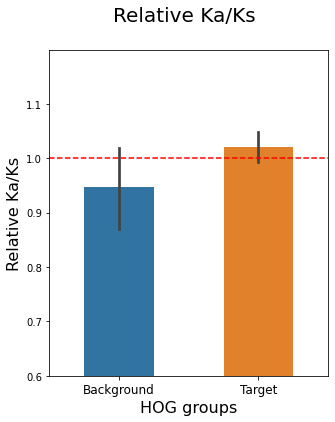

In [19]:
fig,ax=plt.subplots(figsize=(5,6))

sns.barplot(x="target",y="ratio",data=df_final,order=["NO","YES"])
ax.set_xticklabels(["Background","Target"],fontsize=12)
#ax.set_yticklabels(fontsize=8)
ax.set_ylim(0.6,1.2)
ax.set_yticks(np.arange(0.6,1.19,0.1))
fig.suptitle('Relative Ka/Ks', fontsize=20)
plt.ylabel('Relative Ka/Ks',fontsize=16)
plt.xlabel('HOG groups', fontsize=16)

# change bar width
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    
    newwidth = 0.5
    
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

# add a horizontal line
kwargs={"color":"red","linestyle":"--"}
ax.axhline(1.0,**kwargs)

plt.show()

In [20]:
fig.savefig("Figure5D.png",dpi=300)

In [21]:
## T-test
from scipy.stats import ttest_ind
df_target = df_final[df_final.target=="YES"]["ratio"]
df_background = df_final[df_final.target=="NO"]["ratio"]

ttest_ind(df_target,df_background)

Ttest_indResult(statistic=2.176900275770769, pvalue=0.030031290960439782)

## normalize kaks ploting kde density

In [22]:
df_final = df_final[df_final["ratio"] != 1] ## remove HOG without background gene
df_YES = df_final[df_final["target"] == "YES"]
df_NO = df_final[df_final["target"] == "NO"]

In [23]:
df_YES.shape

(89, 10)

In [24]:
df_NO.shape

(118, 10)

In [25]:
df_NO3 = pd.concat([df_NO,df_NO,df_NO])
df_NO3.reset_index(drop=True,inplace=True)
df_YES4 = pd.concat([df_YES,df_YES,df_YES,df_YES])
df_YES4.reset_index(drop=True,inplace=True)

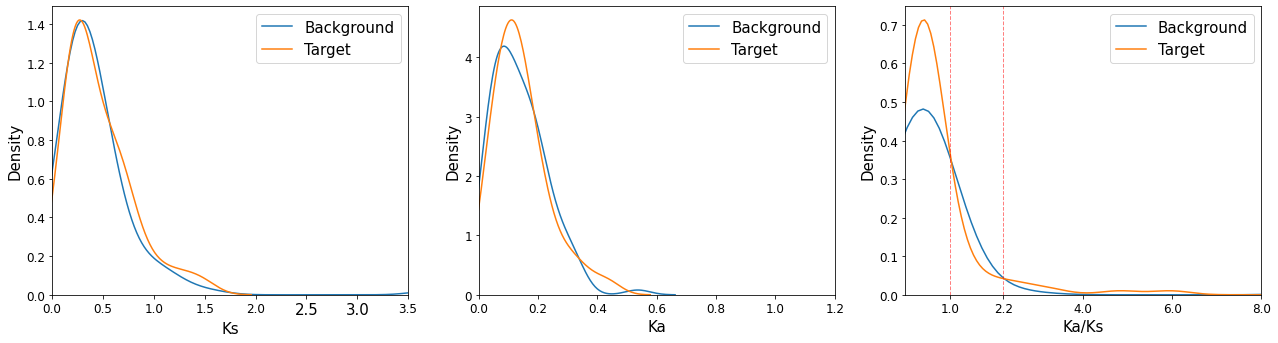

In [27]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

## set fontsize globally
plt.rcParams['font.size'] = '15'
kwargs={"color":"red","linewidth":1,"linestyle":"--"}

## Plotting Ks
sns.kdeplot(data=df_NO3, x="Ks",ax=axes[0],bw_adjust=1.5,label='Background')
sns.kdeplot(data=df_YES4, x="Ks",ax=axes[0],bw_adjust=1.5,label='Target')
axes[0].set_xlim(0,3.5)
axes[0].legend()
#axes[0].axvline(0.29,**kwargs,alpha=0.5)
#plt.savefig("Ks.png",dpi=600)

## Plotting Ka
sns.kdeplot(data=df_NO3, x="Ka",ax=axes[1],bw_adjust=1.5,label='Background')
sns.kdeplot(data=df_YES4, x="Ka",ax=axes[1],bw_adjust=1.5,label='Target')
axes[1].set_xlim(0,1.2)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].legend()
#axes[1].axvline(0.08,**kwargs,alpha=0.5)
#axes[1].axvline(0.115,**kwargs,alpha=0.5)
#plt.savefig("Ka.png",dpi=600)

## Plotting Kaks
sns.kdeplot(data=df_NO3, x="Ka/Ks",ax=axes[2],label='Background')
sns.kdeplot(data=df_YES4, x="Ka/Ks",ax=axes[2],label='Target')
axes[2].set_xlim(0,8)
axes[2].legend()
#x=np.arange(10)
x=[1.0,2.2,4.0,6.0,8.0]
axes[2].set_xticks(x)
axes[2].axvline(1.0,**kwargs,alpha=0.5)
axes[2].axvline(2.2,**kwargs,alpha=0.5)

for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

plt.tight_layout()
plt.show()

In [28]:
fig.savefig("Figure5A-5C_wheatV2.png",dpi=600)